<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_15_Matplotlib Scatter Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟨 Median Yearly Salary vs. Job Count (2.15.1)

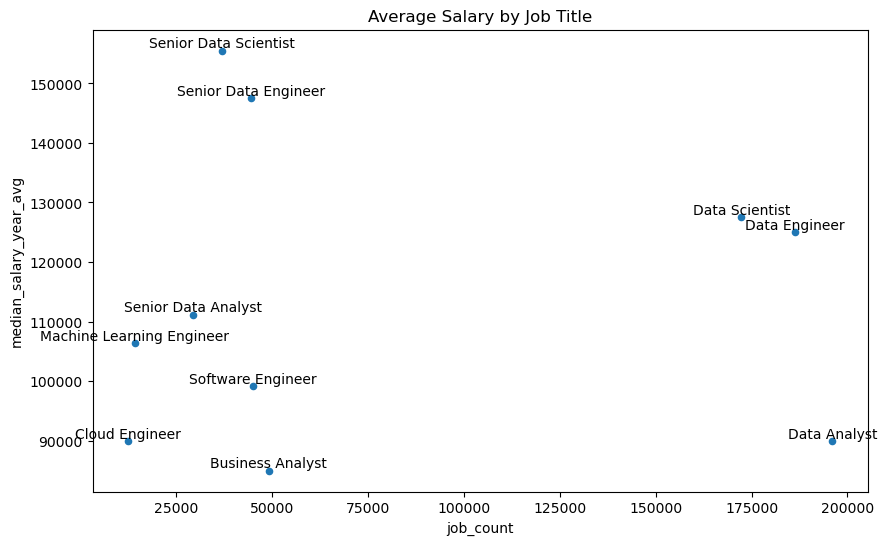

In [3]:
df_median = df.groupby('job_title_short').agg(median_salary_year_avg=('salary_year_avg', 'median'), job_count=('job_title_short', 'count')).dropna()

df_median.plot(kind='scatter', x='job_count', y='median_salary_year_avg', title='Average Salary by Job Title', figsize=(10, 6))

# list comprehension: 
# [plt.text(df_median['job_count'].iloc[i], df_median['median_salary_year_avg'].iloc[i], df_median.index[i]) for i in range(len(df_median))]

for i in range(len(df_median)):
    job_count = df_median['job_count'].iloc[i]
    mean_salary = df_median['median_salary_year_avg'].iloc[i]
    job_title = df_median.index[i]
    plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')

plt.show()

---

## 🟨 Top 7 Countries by Median Yearly Salary vs Job Count  (2.15.2)

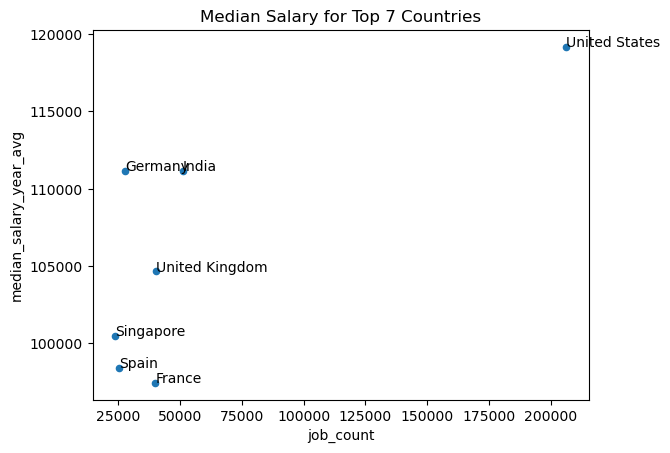

In [4]:
df_top_7 = df.groupby('job_country').agg(median_salary_year_avg=('salary_year_avg', 'median'), job_count=('job_country', 'count')).dropna()
df_top_7 = df_top_7.sort_values(by='job_count', ascending=False).head(7)
df_top_7.plot(kind='scatter', x='job_count', y='median_salary_year_avg', title='Median Salary for Top 7 Countries')

[plt.text(df_top_7['job_count'].iloc[i], 
          df_top_7['median_salary_year_avg'].iloc[i], 
          df_top_7.index[i]) 
          for i in range(len(df_top_7))
] # list comprehension

# alternative for loop:
# for i in range(len(df_top_7)):
#      job_count = df_top_7['job_count'].iloc[i]
#      median_salary = df_top_7['median_salary_year_avg'].iloc[i]
#      job_country = df_top_7.index[i]
#      plt.text(job_count, median_salary, job_country, ha='center', va='bottom')

plt.show()

---

## 🟥 Average Yearly Salary vs. Job Count for Top Roles by Schedule Type (2.15.3)

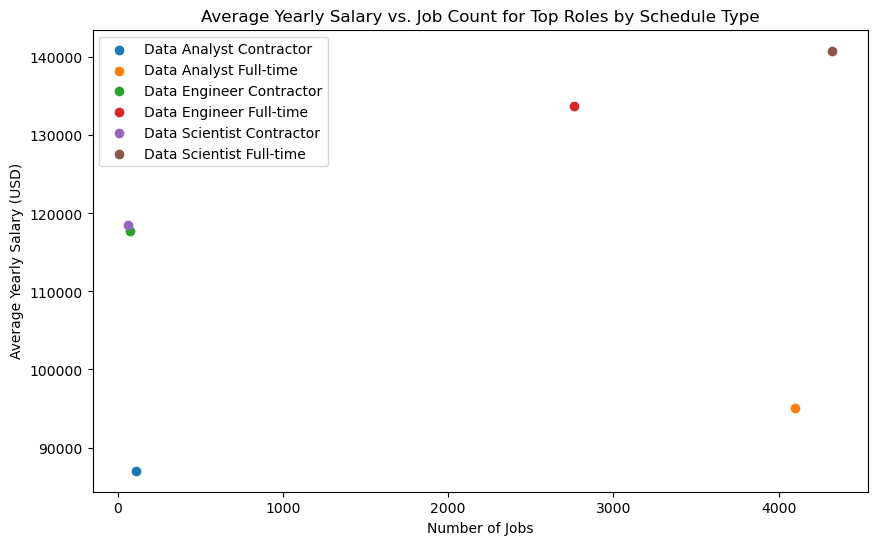

In [5]:
# Code Needed
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_US = df[df['job_country'] == 'United States'].dropna(subset=['salary_year_avg']) # drop rows with NaN values in salary_year_avg and filter for US
df_filtered = df_US[df_US['job_title_short'].isin(target_job_titles)] # filter for target job titles
df_filtered = df_filtered[(df_filtered['job_schedule_type'] == 'Full-time') | (df_filtered['job_schedule_type'] == 'Contractor')] # filter for full-time and contractor positions
df_filtered['job_title_type'] = df_filtered['job_title_short'] + ' ' + df_filtered['job_schedule_type'] # create new column with job title and schedule type

df_grouped = df_filtered.groupby('job_title_type').agg(mean_salary_year_avg=('salary_year_avg', 'mean'), job_count=('job_title_short', 'count')).dropna() # group by job title and schedule type and calculate mean salary

# plot using plt.scatter():
# -------------------------
#df_filtered.plot(kind='scatter', x='job_count', y='mean_salary_year_avg', title='Average Salary by Job Title and Schedule Type')

# for job_title_type in df_grouped.index:
#     plt.scatter(df_grouped.loc[job_title_type, 'job_count'], df_grouped.loc[job_title_type, 'mean_salary_year_avg'], label=job_title_type)

# plt.xlabel('Number of Jobs')
# plt.ylabel('Average Yearly Salary (USD)')
# plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
# plt.legend()
# plt.show()
# -------------------------

# Create scatter plot using pandas
ax = df_grouped.plot(kind='scatter', x='job_count', y='mean_salary_year_avg', figsize=(10, 6))

# Plot each job title type separately to ensure they appear in the legend
for job_title_type in df_grouped.index:
    ax.scatter(df_grouped.loc[job_title_type, 'job_count'], df_grouped.loc[job_title_type, 'mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()

---